## Search algorithms

We can generally classify AI in two paradigms:
- **Solvers**: given a specification of a problem, *search* for a solution.
- **Learners**: given a set of examples, *search* for a hypothesis (model) that best describes the examples or underlying problem.

This first week is about solvers, where we use search algorithms:
- Depth-first search
- Breadth-first search

First, we look at relevant data structures. 

### First In First Out (FIFO)

Try to implement the FIFO (queue) structure

In [ ]:
class FIFO:
    def __init__(self):
        ##############################
        ### initialize an empty list
        ### write code here
        ##############################
        pass

    def push(self, val):
        ##############################
        ### push new values into the list
        ### write code here
        ##############################
        pass

    def get(self, idx):
        ##############################
        ### get values by index
        ### write code here
        ##############################
        pass

    def __len__(self):
        ##############################
        ### return length of queue
        ### write code here
        ##############################
        pass
        
    def pop(self):
        ##############################
        ### pop the first element in the list
        ### write code here
        ##############################
        pass

In [ ]:
d = FIFO()
d.push(4)
d.push(5)

d.pop()
a = d.pop()

# test
assert a == 5 and len(d) == 0

### Last In First Out (LIFO)

Try to implement the LIFO (stack) structure

In [3]:
class LIFO:
    def __init__(self):
        ##############################
        ### initialize an empty list
        ### write code here
        ##############################
        pass 
    
    def push(self, val):
        ##############################
        ### push new values into the list
        ### write code here
        ##############################
        pass
    
    def get(self, idx):
        ##############################
        ### get values by index
        ### write code here
        ##############################
        pass
    
    def __len__(self):
        ##############################
        ### return length of queue
        ### write code here
        ##############################
        pass
    
    def pop(self):
        ##############################
        ### pop the last element in the list
        ### write code here
        ##############################
        pass

In [ ]:
d = LIFO()
d.push(4)
d.push(5)

d.pop()
a = d.pop()

# test
assert a == 4 and len(d) == 0

### Priority Queue

This structure assigns priorities to the values in the queue and sorts these values based on the priorities.

Priorities are determined based on some arbitrary function, $f(x)$, that we specify. Some possible priority functions are:
- $f(x)$ as a **cost** function
- $f(x)$ as a **utility** function

Try to implement a trivial priority queue

In [ ]:
from functools import cmp_to_key

class PriorityQueue:
    def __init__(self, f):
        ##############################
        ### initialize an empty list
        ### set function f to self
        ### write code here
        ##############################
        pass

    def push(self, val):
        ##############################
        ### push new values into the list
        ### sort list in descending order based on self.f
        ### write code here
        ##############################
        pass

    def get(self, idx):
        ##############################
        ### get values by index
        ### write code here
        ##############################
        pass

    def __len__(self):
        ##############################
        ### return length of queue
        ### write code here
        ##############################
        pass
        
    def pop(self):
        ##############################
        ### pop the first element in the list
        ### write code here
        ##############################
        pass

# init queue with priority function f(a, b) = b - a
# i.e., a < b for all a, b in queue
queue = PriorityQueue(lambda a, b: b - a) 

queue.push(4)
queue.push(5)
queue.push(2)
queue.push(7)

assert queue._data == [2, 4, 5, 7]

queue.push(1)

assert queue._data == [1, 2, 4, 5, 7]

### Graph search

Try to implement the Graph structure in the following. 
The idea is to be able to add edges to the graph and traverse its values based on 
- BFS: breadth first search (FIFO)
- DFS: depth first search (LIFO)

In [8]:
from collections import defaultdict
 
# This class represents an undirected graph
class Graph:
 
    def __init__(self):
        self.graph = defaultdict(list)      # init dictionary of empty lists
 
    # Function to add an undirected edge to graph
    def add_edge(self, u: int, v: int):
        ##############################
        ### add an edge by appending v to the list of graph[u] and vice versa 
        ### write code here
        ##############################
        pass
    
    def traversal(self, initial_node: int, algorithm='bfs'):
        
        frontier = None
        ##############################
        ### if algorithm is 'bfs', initialize frontier as a FIFO
        ### if algorithm is 'dfs', initialize frontier as a LIFO
        ### write code here
        ##############################
                
        frontier.push(initial_node)         # push initial node into frontier
        reached = [initial_node]            # initial node is already reached

        while len(frontier) != 0:           # continue until the queue is empty
            
            node = frontier.pop()           # get first node in queue
            print(node, end=' ')            # print this node

            for child in self.graph[node]:  # iterate through children of node
                ##############################
                ### if child is not yet reached, 
                ###     append it in the reached list
                ###     push child into FIFO/LIFO queue
                ### write code here
                ##############################
                pass

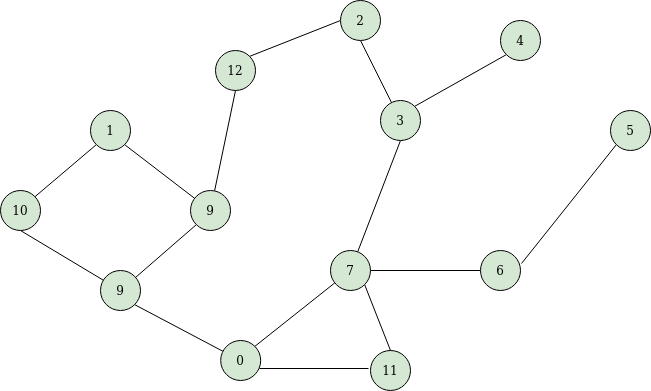

In [9]:
g = Graph()
g.add_edge(2, 3);  g.add_edge(3, 4);  g.add_edge(3, 7);  g.add_edge(7, 6)
g.add_edge(6, 5);  g.add_edge(7, 11); g.add_edge(7, 0);  g.add_edge(0, 9)
g.add_edge(0, 11); g.add_edge(9, 9);  g.add_edge(9, 10); g.add_edge(10, 1)
g.add_edge(1, 9);  g.add_edge(9, 12); g.add_edge(12, 2)

In [ ]:
print('Implementation')
g.traversal(0, algorithm='bfs')

print('\nActual traversal')
print(' '.join(map(str, [0, 7, 9, 11, 3, 6, 10, 1, 12, 2, 4, 5])))

In [11]:
print('Implementation')
g.traversal(0, algorithm='dfs')

print('\nActual traversal')
print(' '.join(map(str, [0, 7, 9, 11, 3, 6, 10, 1, 12, 2, 4, 5])))

0 11 9 12 2 3 4 1 10 7 6 5 

Note: depth-first is usually applied in directed graphs and trees, which makes the order in undirected graphs less intuitive. 

### Uniform-cost search (Dijkstra) 

In the algorithm of Dijkstra, we use an adjacency matrix representation of a graph. 

Given an undirected graph:

```
a --\
|    c -- d
b --/
```
Its adjacency matrix is then:

| |a|b|c|d|
|-|-|-|-|-|
|**a**|0|1|1|0|
|**b**|1|0|1|0|
|**c**|1|1|0|1|
|**d**|0|0|1|0|

Notice that:
- the matrix is symmetric over the diagonal
- the 1's represent weights between nodes
- gives us a way to inject information for each edge in the graph

In the following, implement the AdjacencyGraph structure and Dijkstra's algorithm. 
For this to work, you need to implement min_distance that finds the node with the minimal index 

In [1]:
# Python program for Dijkstra's single source shortest path algorithm. 
# The program is for adjacency matrix representation of the graph
class AdjacencyGraph:

	def __init__(self, graph: list[list[int]]):
		self.V = len(graph)
		self.graph = graph
		self.dist = None

	def print_solution(self):
		print("Node \t Distance from Source")
		for node in range(self.V):
			print(node, "\t\t", self.dist[node])

	# A utility function to find the node with
	# minimum distance value, from the set of nodes
	# not yet included in shortest path tree
	def min_distance(self, sptSet):

		
		##############################
		### Initialize minimum distance as infinity
        ### write code here
        ##############################
		
		# Search through nodes not in the shortest path tree
		# that are less than min
		min_index = -1
		for v in range(self.V):
			##############################
			### compare node with minimum and check whether node is not in the shortest path tree
			### 	assign new minimum and minimum index
			### write code here
			##############################
			pass

		return min_index

	def dijkstra(self, src):

		self.dist = [1e7] * self.V
		self.dist[src] = 0
		sptSet = [False] * self.V	# shortest path tree set

		for _ in range(self.V):

			# Pick the minimum distance node from
			# the set of nodes not yet processed.
			# u is always equal to src in first iteration
			u = self.min_distance(sptSet)

			# Put the minimum distance node in the
			# shortest path tree
			sptSet[u] = True

			# Update dist value of the adjacent vertices
			# of the picked node only if the current
			# distance is greater than new distance and
			# the node is not in the shortest path tree
			for v in range(self.V):
				if (self.graph[u][v] > 0 and sptSet[v] == False and \
					self.dist[v] > self.dist[u] + self.graph[u][v]):

					self.dist[v] = self.dist[u] + self.graph[u][v]

		self.print_solution()

# This code is contributed by Divyanshu Mehta

In [2]:
graph = [
	[0, 4, 0, 0, 0, 0, 0, 8, 0],
	[4, 0, 8, 0, 0, 0, 0, 11, 0],
	[0, 8, 0, 7, 0, 4, 0, 0, 2],
	[0, 0, 7, 0, 9, 14, 0, 0, 0],
	[0, 0, 0, 9, 0, 10, 0, 0, 0],
	[0, 0, 4, 14, 10, 0, 2, 0, 0],
	[0, 0, 0, 0, 0, 2, 0, 1, 6],
	[8, 11, 0, 0, 0, 0, 1, 0, 7],
	[0, 0, 2, 0, 0, 0, 6, 7, 0]
]

# Example of a directed graph
# note that the adjacency matrix is not symmetric along the diagonal
graph2 = [
	[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,2,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,2,0,3,0,0,0,0,1,2,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0],
	[0,0,0,1,0,0,0,0,0,5,2,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]

g = AdjacencyGraph(graph2)

g.dijkstra(0)

Node 	 Distance from Source
0 		 0
1 		 1
2 		 3
3 		 9
4 		 11
5 		 7
6 		 5
7 		 4
8 		 8
9 		 13
10 		 10
11 		 5
12 		 6
13 		 6
14 		 9
15 		 10
16 		 15
17 		 7
18 		 11
19 		 13
